## Using Polynomial Regrssion

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [178]:
df = pd.read_csv('Advertising.csv')

In [179]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [180]:
X = df.drop('sales', axis = 1)
y = df['sales']

## Polynomial regression

In [181]:
from sklearn.preprocessing import PolynomialFeatures

In [182]:
polynomial_converter = PolynomialFeatures(degree=3, include_bias=False)

In [183]:
polynomial_features =polynomial_converter.fit_transform(X)    # we can also do fit and transform function seperatly 

In [184]:
from sklearn.model_selection import train_test_split

In [185]:
X_train, X_test, y_train, y_test = train_test_split(polynomial_features, y, test_size=0.3, random_state=42)

In [186]:
from sklearn.linear_model import LinearRegression

In [187]:
model = LinearRegression()

In [188]:
model.fit(X_train, y_train)

LinearRegression()

In [189]:
y_predict = model.predict(X_test)

In [190]:
model.coef_

array([ 9.38241670e-02,  9.36139206e-03,  2.66141547e-02, -4.47068827e-04,
        1.42356485e-03, -3.39749487e-04,  2.19736464e-04,  2.68937310e-04,
        1.19505714e-04,  7.41548070e-07, -9.01188135e-07,  1.11516282e-06,
       -1.38557051e-07, -2.99514680e-06,  5.05487906e-08, -3.52356150e-06,
        3.61635947e-06, -1.67809140e-06, -1.48890757e-06])

In [191]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [192]:
MAE = mean_absolute_error(y_test, y_predict)
MAE

0.3972831213171997

In [193]:
MSE = mean_squared_error(y_test, y_predict)
MSE

0.2907744915133248

In [194]:
RMSE = np.sqrt(MSE)
RMSE

0.5392350985547257

In [195]:
residual = y_test-y_predict

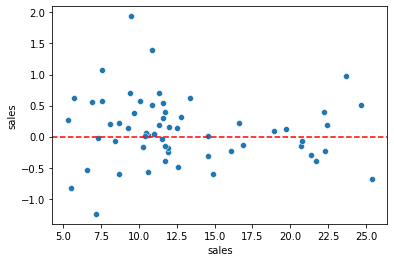

In [196]:
sns.scatterplot(x=y_test, y= residual)
plt.axhline(y=0, color='r', ls='--')

## Check Model Complexity (Using different degree value)

1. Create different order polynomial X data
2. Split that polynomial data for train/test
3. Fit on the training data
4. Report back the metrics on *both* the train and test results
5. Plot these results and explore overfitting

In [197]:
train_rmse_error = []
test_rmse_error = []

degree= range(1,10)

for d in degree:
    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d, include_bias=False)
    polynomial_feature = polynomial_converter.fit_transform(X)
    
    # SPLIT THIS NEW POLY DATA SET
    X_train, X_test, y_train, y_test = train_test_split(polynomial_feature, y, test_size=0.3, random_state=42)
    
    # TRAIN ON THIS NEW POLY SET
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)
    
    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Calculate Errors
    
    # Errors on Train Set
    RMSE_train = np.sqrt(mean_squared_error(y_train, train_pred))
    
    # Errors on Test Set
    RMSE_test = np.sqrt(mean_squared_error(y_test, test_pred))
    
    # Append errors to lists for plotting later
    train_rmse_error.append(RMSE_train)
    test_rmse_error.append(RMSE_test)


In [198]:
train_rmse_error

[1.574596830590544,
 0.5950712355838925,
 0.46887581118220834,
 0.3694689701771486,
 0.24382206681992113,
 0.1968709132922257,
 0.5139388102445777,
 0.164992649519144,
 0.16031035375078534]

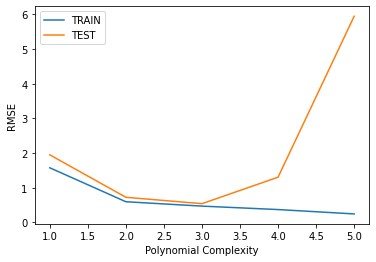

In [199]:
plt.plot(range(1,6),train_rmse_error[:5],label='TRAIN')
plt.plot(range(1,6),test_rmse_error[:5],label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

### So from graph we came to know that degree we need to select 3 to get minimum RMSE

## Saving Model 

In [200]:
final_model = LinearRegression()

In [201]:
final_model.fit(X, y)

LinearRegression()

In [202]:
from joblib import dump, load

In [203]:
dump = dump(final_model, 'final_sale.joblib')

In [204]:
load_file = load('final_sale.joblib')

## We can use this file for future use